In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from Inleveropgave2.main import reformatMatrix, printTriangleMatrix

from Inleveropgave2.doolhof.maze import Maze
from Inleveropgave2.doolhof.agent import Agent
from Inleveropgave2.doolhof.policy import Policy

In [3]:
startPos = (2, 0)

doolhof = Maze()
policy = Policy(doolhof)

startStateIndex = doolhof.coordsToIndex(startPos)
startState = doolhof.map[startStateIndex[0]][startStateIndex[1]]

agent = Agent(doolhof, policy, startState)

# Model-Free Prediction

## First-visist MC prediction

### Optimal policy

In [4]:
agent.policy.matrix = [
    [[0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1]],
    [[0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 1]]]

values = agent.monteCarloPolicyEvaluation(10000, discount=1)
for row in values:
    print(row)

[38.0, 39.0, 40.0, 0]
[37.0, 38.0, 39.0, 40.0]
[36.0, 37.0, 36.0, 35.0]
[0, 36.0, 35.0, 34.0]


Dit is de optimal value function net als in de vorige opdracht

In [5]:
agent.policy.matrix = [
    [[0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1]],
    [[0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 1]]]

values = agent.monteCarloPolicyEvaluation(10000, discount=0.9)
for row in values:
    print(row)

[30.5, 35.0, 40.0, 0]
[26.450000000000447, 30.5, 35.0, 40.0]
[22.805000000000184, 26.449999999998127, 22.805000000000266, 19.52449999999983]
[0, 22.805000000000184, 19.52449999999984, 16.572050000000104]


Dit is ongeveer de optimal value function net als in de vorige opdracht, maar iets anders door de discount van 0.9 waardoor de stappen in de toekomst minder impact geven.

### Random policy

In [6]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.monteCarloPolicyEvaluation(10000, discount=1)
for row in values:
    print(row)

[-15.652316792638842, -12.816135084427767, 0.4666836864947664, 0]
[-15.027576974564926, -16.769181173436493, -13.417047817047816, -5.026666666666666]
[-7.438031435197114, -14.221098265895954, -19.062660393498717, -18.633128177682632]
[0, -8.434927983539094, -17.49773635153129, -19.889473684210525]


De lage getallen komen doordat de agent vaak een negatieve reward krijgt omdat hij random door de map loopt, de verhoudingen kloppen wel in vergelijking met de optimale value function

In [7]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.monteCarloPolicyEvaluation(10000, discount=0.9)
for row in values:
    print(row)

[-5.255628649963838, -3.199607484748487, 5.952866850254567, 0]
[-5.162027802180657, -7.717951668316737, -5.200657044485031, 2.8386950655767413]
[-1.1847408600164442, -5.785678438607446, -9.073583257124813, -7.97922697021005]
[0, -1.7544890404153786, -7.011913710121574, -8.373137080220571]


Idem

## Tabular

### Optimal policy

In [8]:
agent.policy.matrix = [
    [[0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1]],
    [[0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 1]]]

values = agent.tabular(10000, discount=1)
for row in values:
    print(row)

[37.999999999999915, 38.99999999999994, 39.99999999999997, 0]
[36.999999999999886, 37.999999999999915, 38.99999999999994, 39.99999999999997]
[35.99999999999986, 36.999999999999886, 35.99999999999986, 34.99999999999983]
[0, 35.99999999999986, 34.99999999999983, 33.9999999999998]


Hieruit komt ook de optimale value function van de vorige opdracht, alleen dan met een extreem kleine afwijking.

In [9]:
agent.policy.matrix = [
    [[0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1]],
    [[0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 1]]]

values = agent.tabular(10000, discount=0.9)
for row in values:
    print(row)

[30.50000000000003, 35.000000000000014, 39.99999999999997, 0]
[26.450000000000045, 30.50000000000003, 35.000000000000014, 39.99999999999997]
[22.805000000000057, 26.450000000000045, 22.805000000000057, 19.524500000000067]
[0, 22.805000000000057, 19.524500000000067, 16.572050000000075]


Hieruit komt ook bijna de optimale value function van de vorige opdracht, door de discount van 0.9 geven de rewards ver in de toekomst minder impact.

### Random policy

In [10]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.tabular(10000, discount=1)
for row in values:
    print(row)

[-15.041871844106089, -14.765717194044196, -9.991392021671672, 0]
[-16.008181172726395, -17.796988374572663, -14.998641811486467, -17.777294297730304]
[-7.758612793378058, -13.514757924239664, -20.87181744581615, -21.5702328139907]
[0, -9.07985261553475, -17.918135657204274, -19.810457465506556]


Ook hier zijn weer negatieve getallen, omdat de randomness er voor zorgt dat er vaak een negatieve reward komt.

In [11]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.tabular(10000, discount=0.9)
for row in values:
    print(row)

[-3.2843586428622285, -0.3860023905120411, 5.351590328647925, 0]
[-3.8842938753461294, -4.593130874059758, -3.91332415769836, 2.2050734793110474]
[1.5946657831988185, -3.0745675355243502, -9.211846020249322, -8.269010703127252]
[0, -0.863488873511639, -7.959324241494071, -8.116276138885691]


Idem

# Model-Free Control

## On-policy first-visit Monte-Carlo Control

### Discount = 1

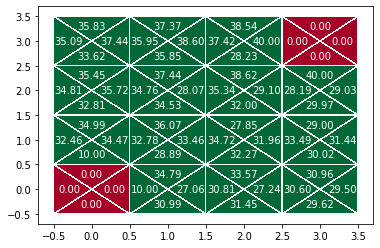

In [12]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.onPolicyFirstVisitMonteCarloControl(episodes=100000, discount=1)
matrix = reformatMatrix(values)
printTriangleMatrix(matrix)

Hier is de optimale policy uit terug te lezen.

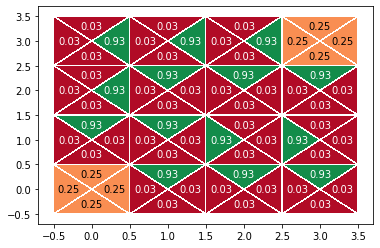

In [13]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

De optimale policy (gecheckt met de docent en klas genoten)

### Discount = 0.9

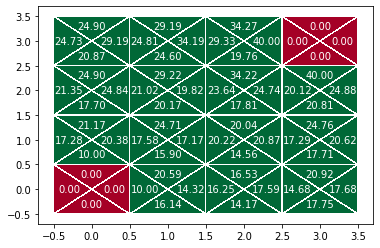

In [14]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.onPolicyFirstVisitMonteCarloControl(episodes=100000, discount=0.9)
matrix = reformatMatrix(values)
printTriangleMatrix(matrix)

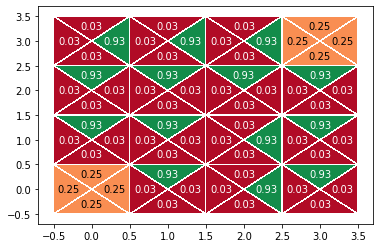

In [15]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

De optimale policy met een discount van 0.9, omdat de reward in de toekomst minder impact geeft is het slimmer op rechts om het water te lopen naar de eind state.

## Sarsa

### Discount = 1

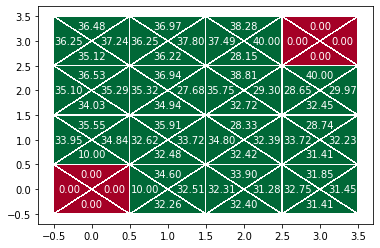

In [16]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.sarsa(episodes=100000, discount=1)
matrix = reformatMatrix(values)
printTriangleMatrix(matrix)

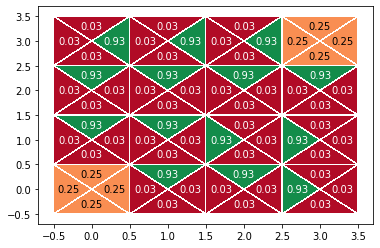

In [17]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

De optimale policy

### Discount = 0.9

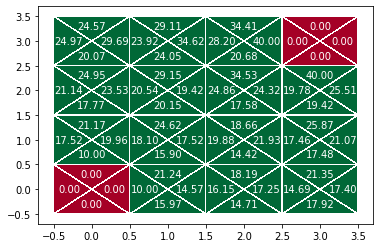

In [18]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.sarsa(episodes=100000, discount=0.9)
matrix = reformatMatrix(values)
printTriangleMatrix(matrix)

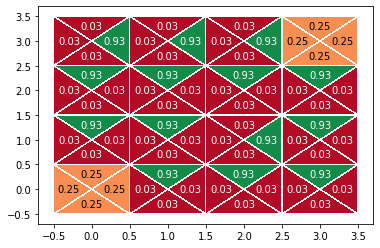

In [19]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

De optimale policy met een discount van 0.9, omdat de reward in de toekomst minder impact geeft is het slimmer op rechts om het water te lopen naar de eind state.

## Q-learning

### Discount = 1

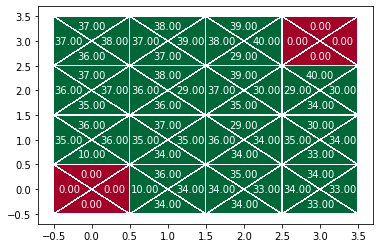

In [22]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.qLearning(episodes=100000, discount=1)
matrix = reformatMatrix(values)
printTriangleMatrix(matrix)

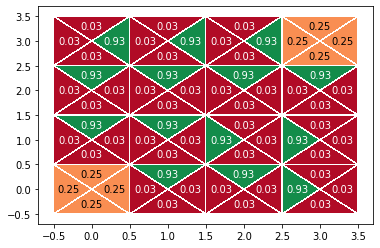

In [23]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

De optimale policy

### Discount = 0.9

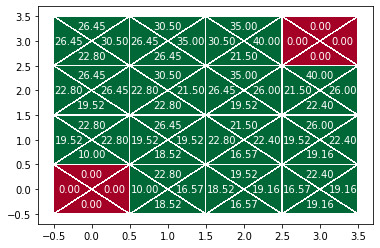

In [24]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.qLearning(episodes=100000, discount=0.9)
matrix = reformatMatrix(values)
printTriangleMatrix(matrix)

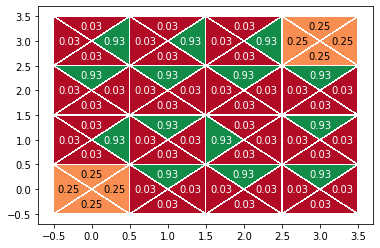

In [25]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

De optimale policy

## Double Q-learning

### Discount = 1

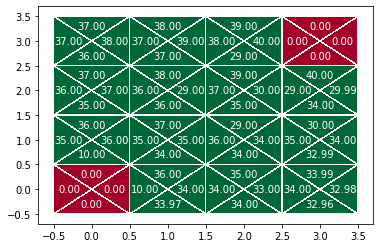

In [26]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

Q1, Q2 = agent.doubleqLearning(episodes=100000, discount=1)
matrix = reformatMatrix(Q1)
printTriangleMatrix(matrix)

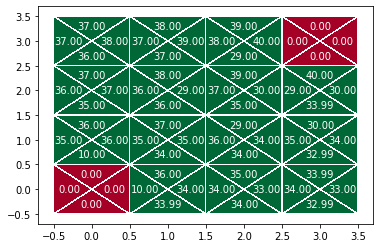

In [27]:
matrix = reformatMatrix(Q2)
printTriangleMatrix(matrix)

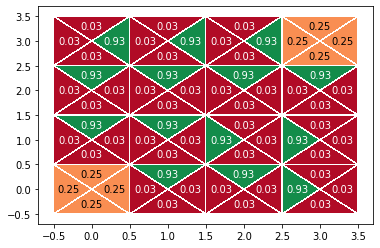

In [28]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

De optimale policy

### Discount = 0.9

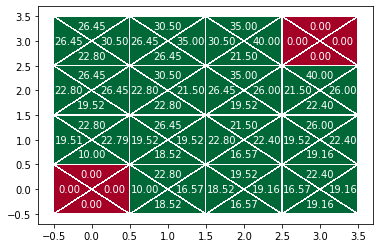

In [29]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

Q1, Q2 = agent.doubleqLearning(episodes=100000, discount=0.9)
matrix = reformatMatrix(Q1)
printTriangleMatrix(matrix)

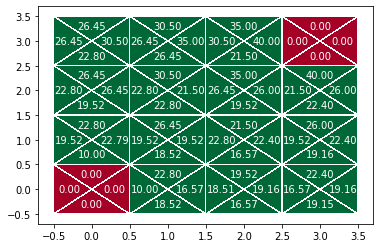

In [30]:
matrix = reformatMatrix(Q2)
printTriangleMatrix(matrix)

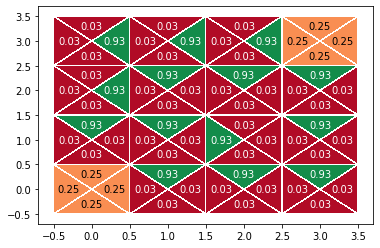

In [31]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

De optimale policy met een discount van 0.9, omdat de reward in de toekomst minder impact geeft is het slimmer op rechts om het water te lopen naar de eind state.